In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import domain_adapt.domain_adapt.new.data as data
import python_utils.python_utils.basic as basic
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import numpy as np
import pdb

In [3]:
# define data

def get_B(D):
    B = np.zeros(D)
    B[0] = 1.
    return B

def get_data(N, D, seed=None):
    np.random.seed(seed)
    xs = np.random.uniform(size=(N,D))
    B = get_B(D)
    ys = np.dot(xs, B)
    noise_sd = 0.4
    ys += np.random.normal(scale=noise_sd, size=N)
    return xs, ys

In [4]:
# 
N = 100
Ds = np.concatenate(([2,5,8],np.arange(10,101,10)))
cs = 2**np.arange(-20,9,1, dtype=float)
num_trials = 5
loss = lambda ys, ys_hat: (np.linalg.norm(ys-ys_hat)**2) / len(ys)

In [5]:
#
seed_shift = 1000
def run(get_data, get_fitter):
    for D in Ds:
        print 'N: %d D: %d' % (N,D)
        losses_fig, losses_ax = plt.subplots()
        dots_fig, dots_ax = plt.subplots()
        losses_train = []
        losses_test = []
        dots = []
        B = get_B(D)
        for c in cs:
            fitter = get_fitter(c)
            trial_losses_train = []
            trial_losses_test = []
            trial_dots = []
            trial_coefs = []
            for i in xrange(num_trials):
                xs_train, ys_train = get_data(N, D, seed=i)
                xs_test, ys_test = get_data(N, D, seed=i+seed_shift)
                predictor = fitter.fit(xs_train, ys_train)
                ys_train_hat = predictor.predict(xs_train)
                ys_test_hat = predictor.predict(xs_test)
                trial_losses_train.append(loss(ys_train, ys_train_hat))
                trial_losses_test.append(loss(ys_test, ys_test_hat))
                trial_dots.append(np.dot(B, predictor.coef_)/np.linalg.norm(predictor.coef_))
                trial_coefs.append(predictor.coef_)
            #print 'c: %.4f' % c
            #print np.mean(trial_coefs, axis=0).T
            losses_train.append(np.mean(trial_losses_train))
            losses_test.append(np.mean(trial_losses_test))
            dots.append(np.mean(trial_dots))
#        pdb.set_trace()
        losses_ax.plot(cs, losses_train, color='red', label='train')
        losses_ax.plot(cs, losses_test, color='blue', label='test')
        losses_ax.set_xscale('log')
        losses_ax.set_xlim((cs.min(),cs.max()))
        losses_ax.set_ylim((0,1))
        losses_ax.legend()
        losses_ax.set_xlabel('c')
        dots_ax.plot(cs, dots, label='dot')
        dots_ax.set_xscale('log')
        dots_ax.set_xlim((cs.min(),cs.max()))
        dots_ax.set_ylim((0,1.5))
        dots_ax.legend()
        losses_ax.set_xlabel('c')
        basic.display_fig_inline(losses_fig)
        basic.display_fig_inline(dots_fig)

N: 100 D: 2


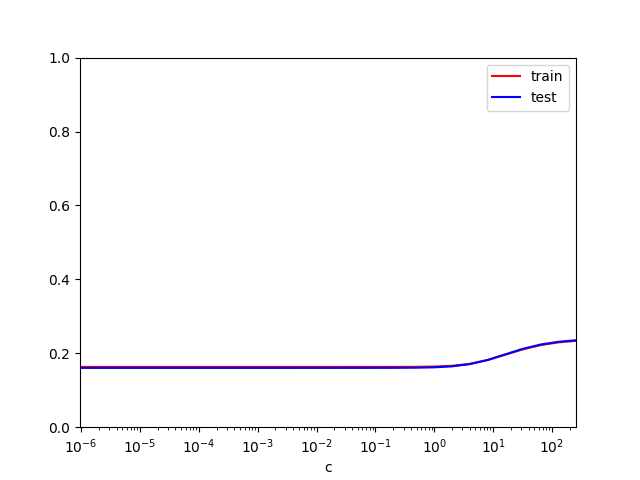

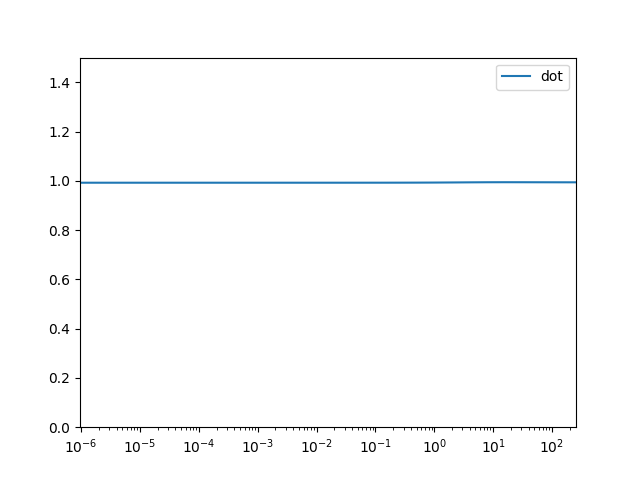

N: 100 D: 5


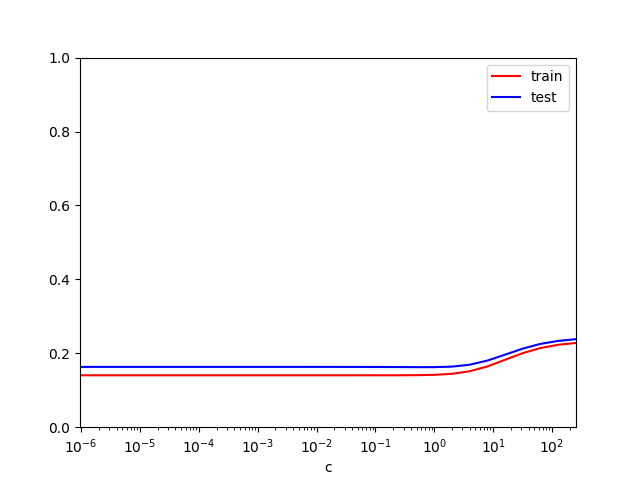

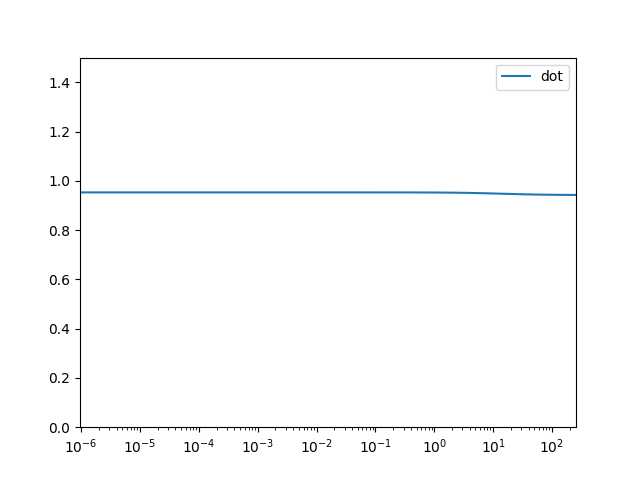

N: 100 D: 8


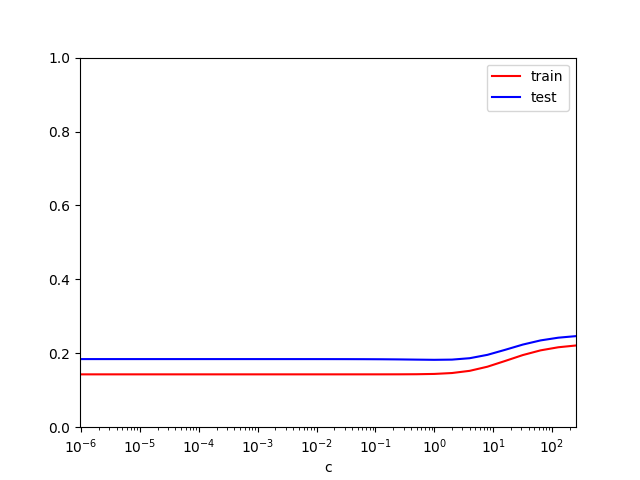

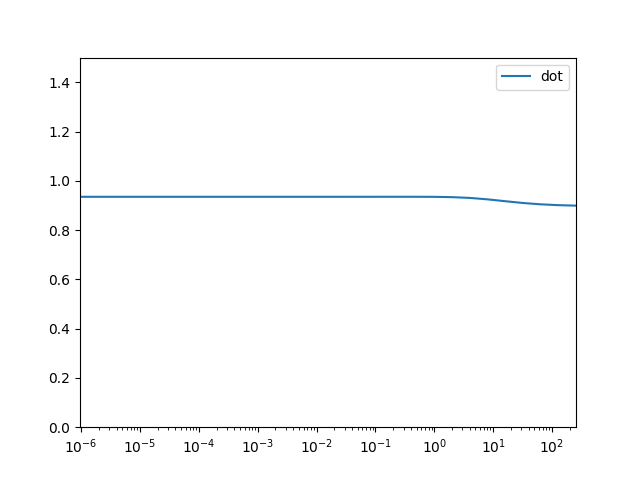

N: 100 D: 10


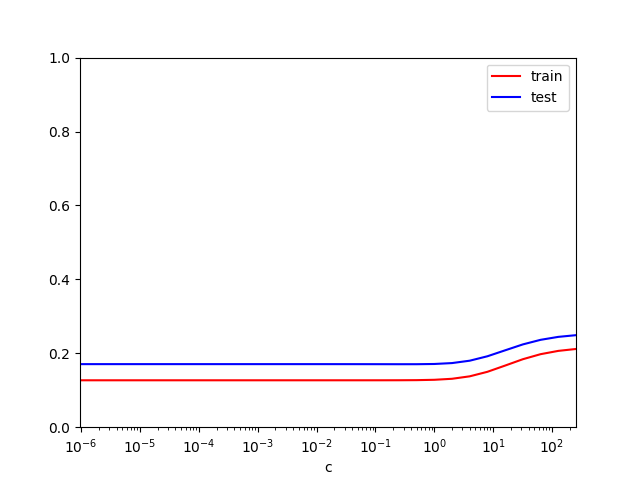

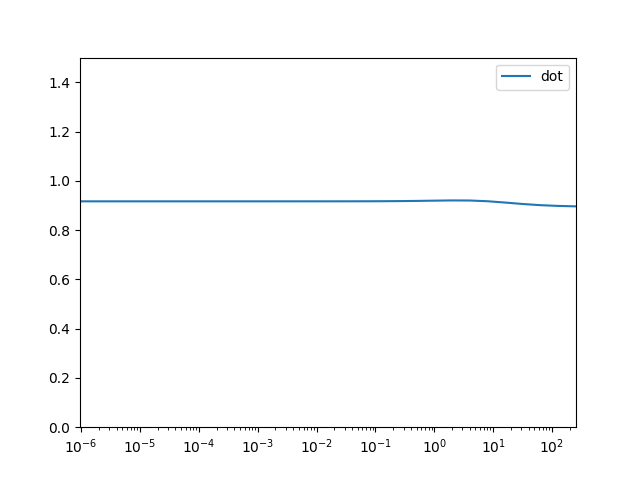

N: 100 D: 20


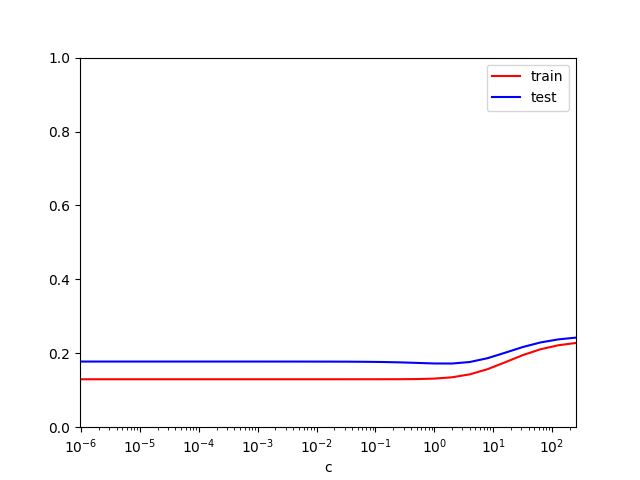

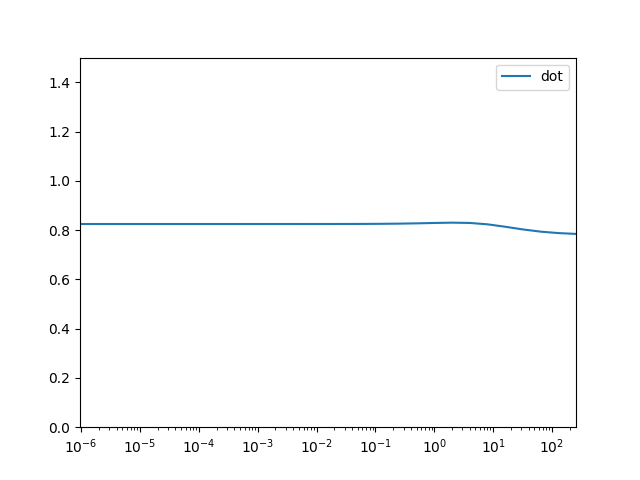

N: 100 D: 30


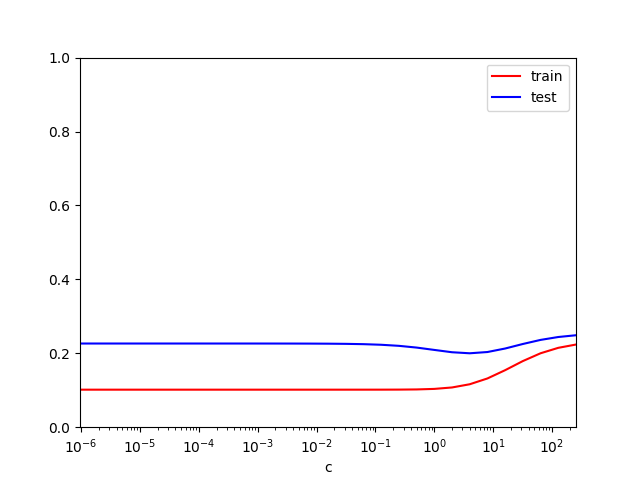

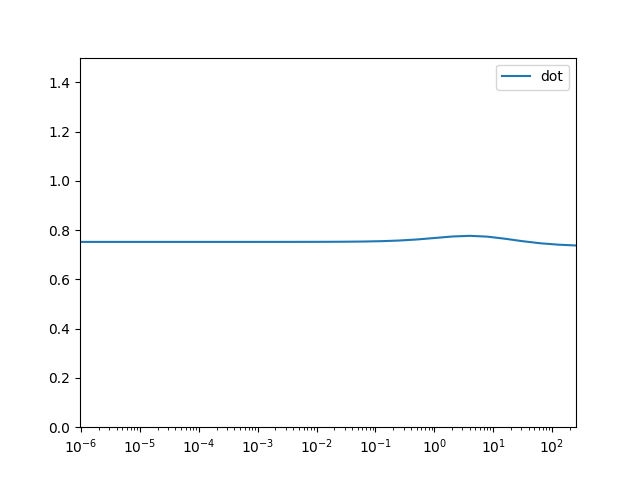

N: 100 D: 40


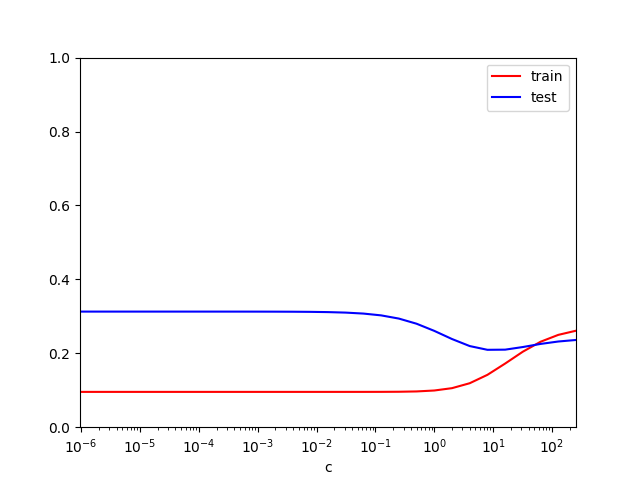

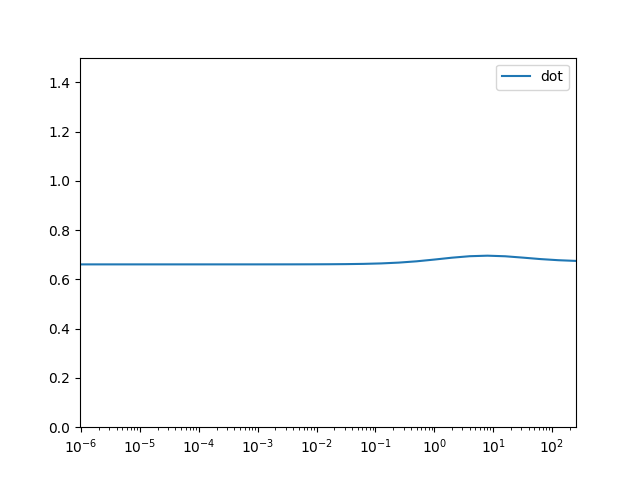

N: 100 D: 50


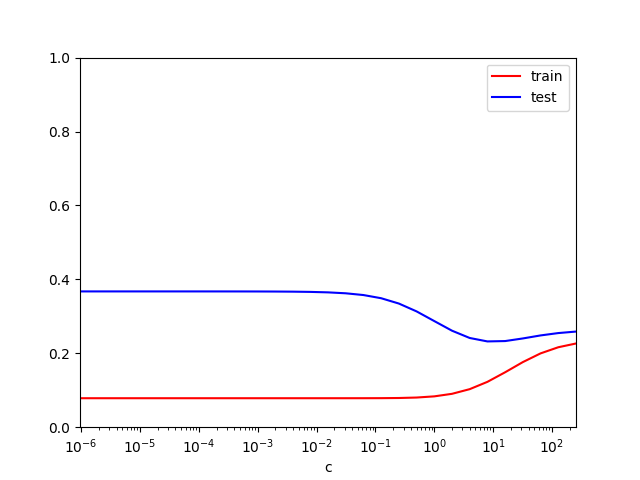

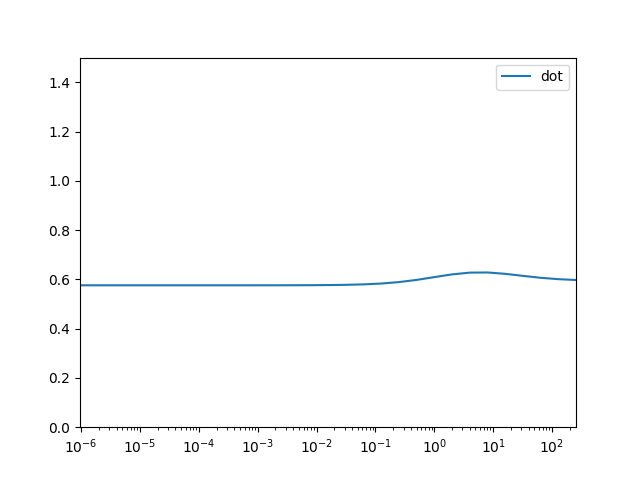

N: 100 D: 60


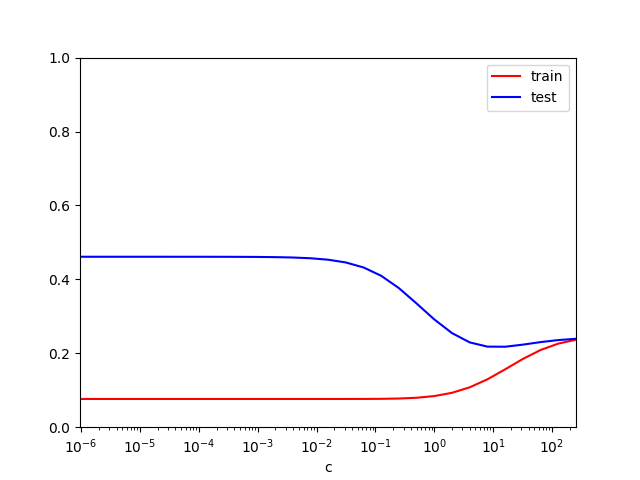

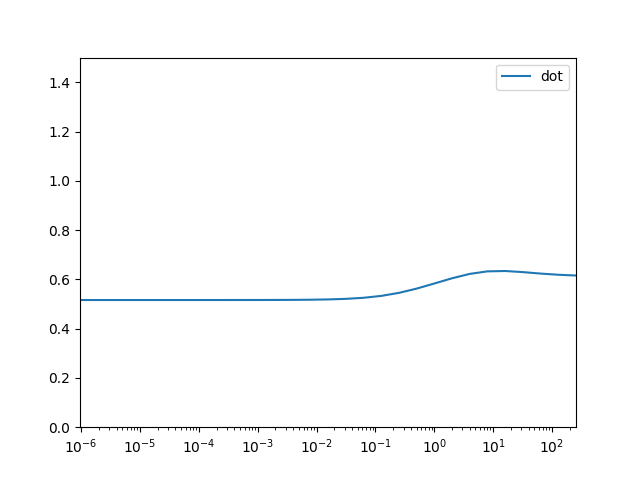

N: 100 D: 70


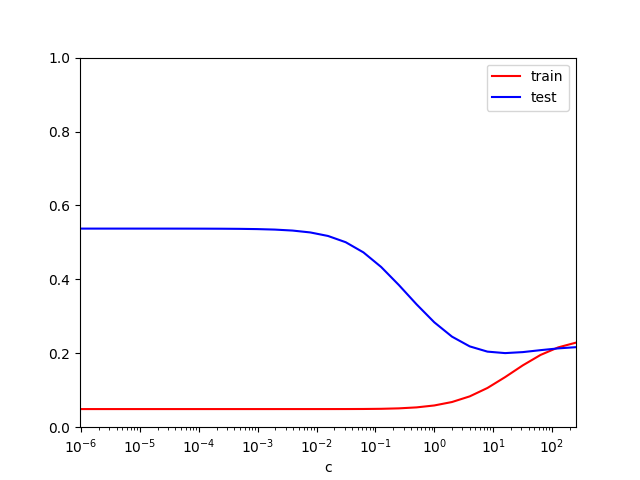

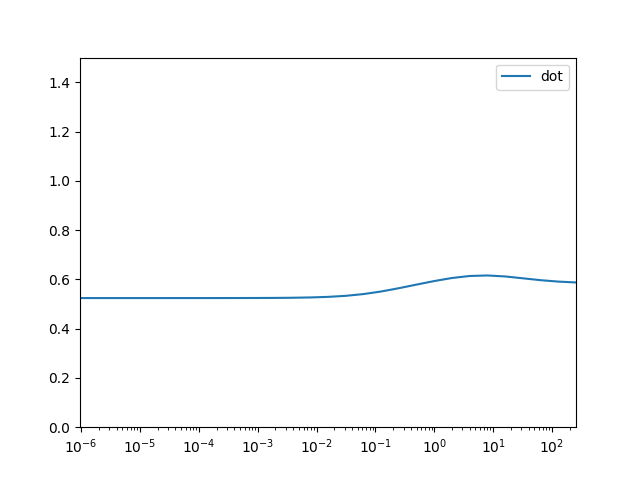

N: 100 D: 80


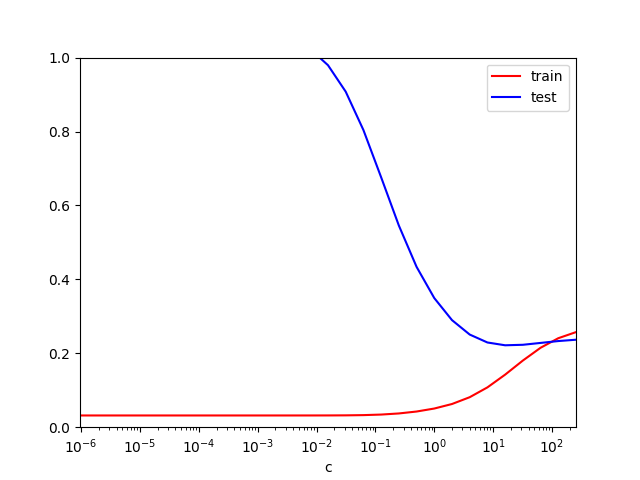

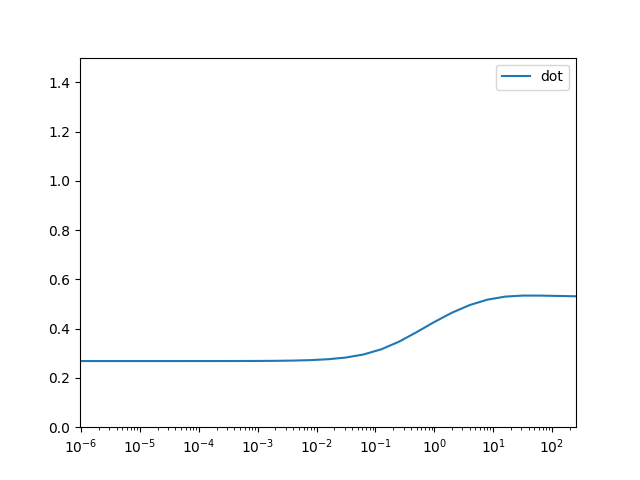

N: 100 D: 90


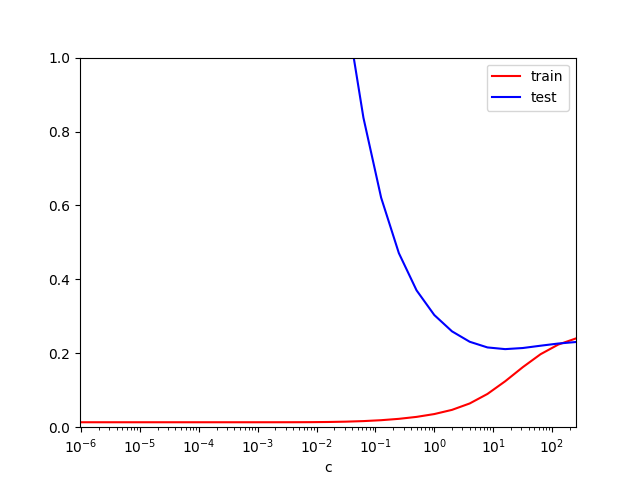

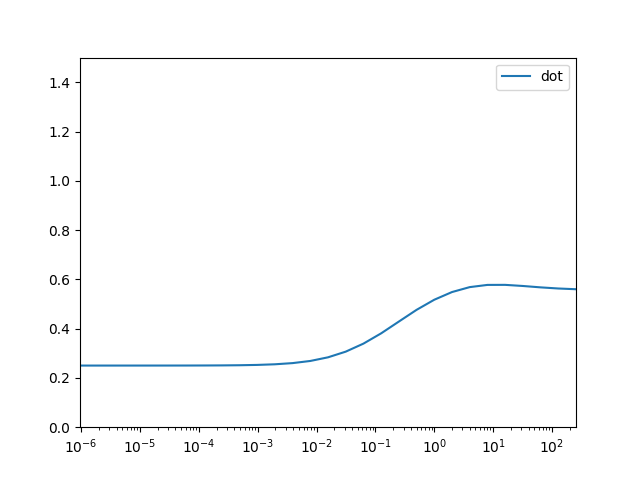

N: 100 D: 100


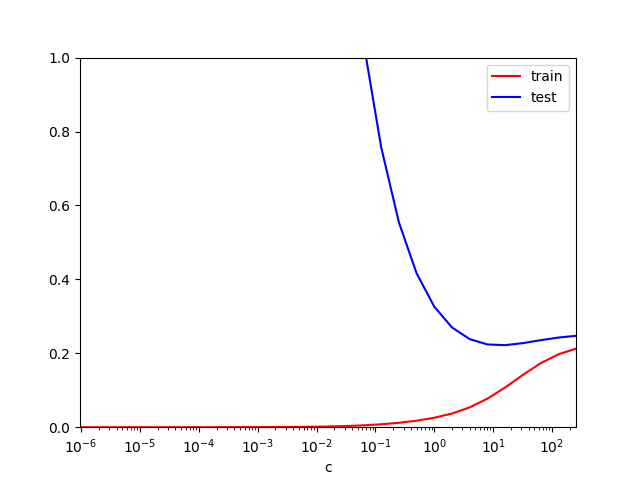

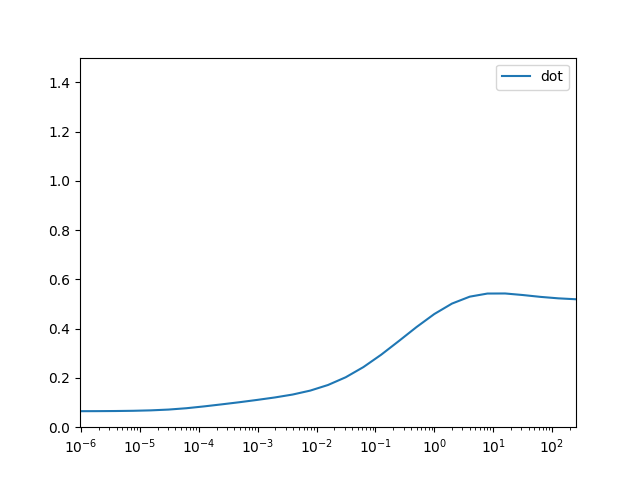

In [6]:
#
from sklearn.linear_model import Ridge
run(get_data, lambda c: Ridge(alpha=c))

N: 100 D: 2


/Users/fultonw/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__main__.py:26: RuntimeWarning: invalid value encountered in double_scalars


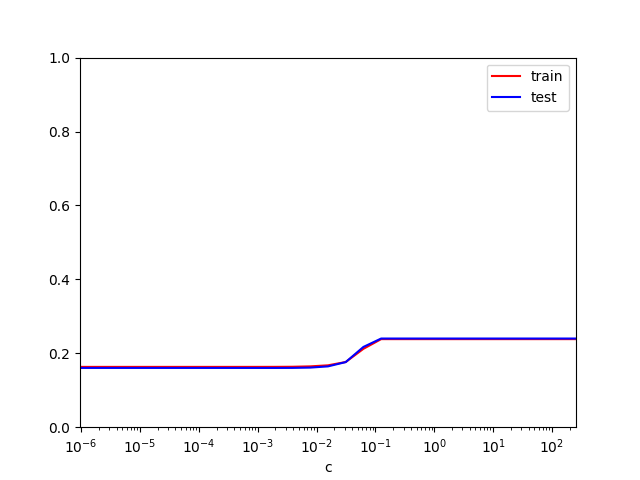

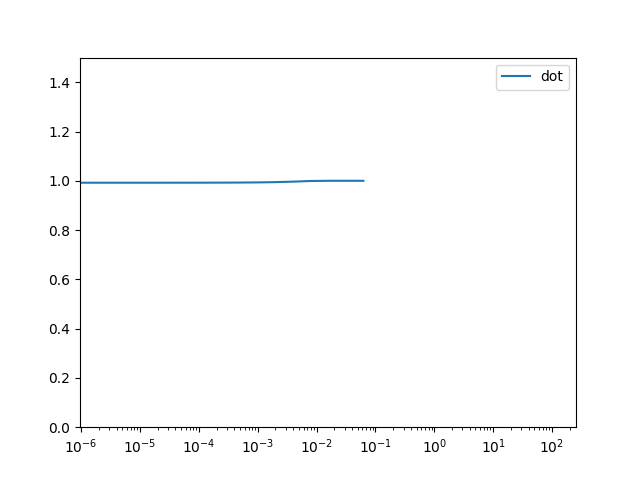

N: 100 D: 5


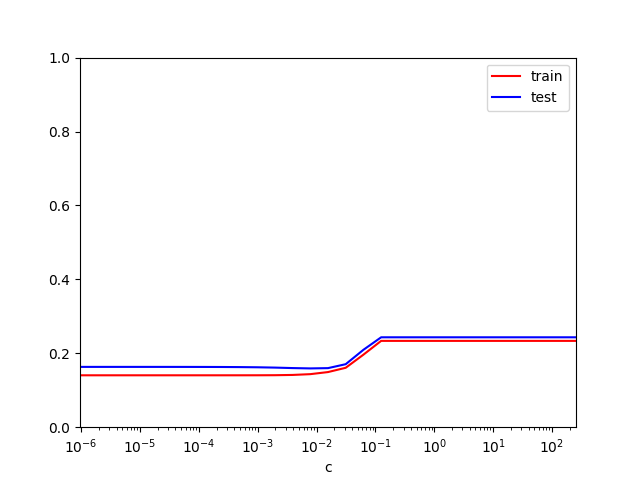

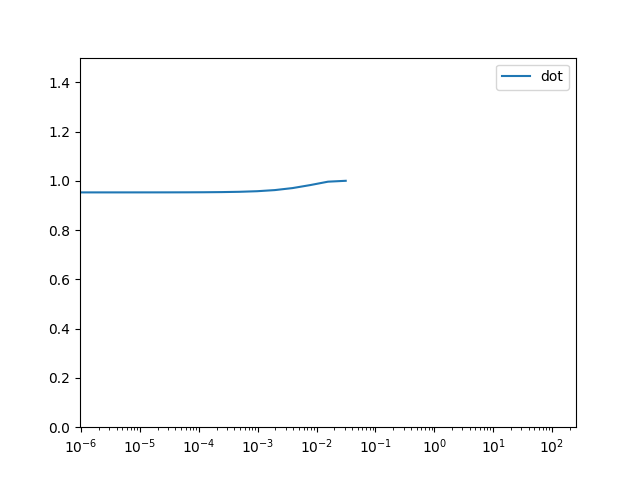

N: 100 D: 8


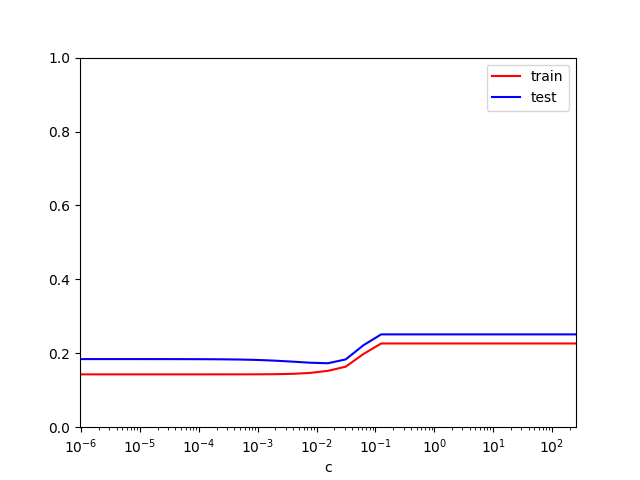

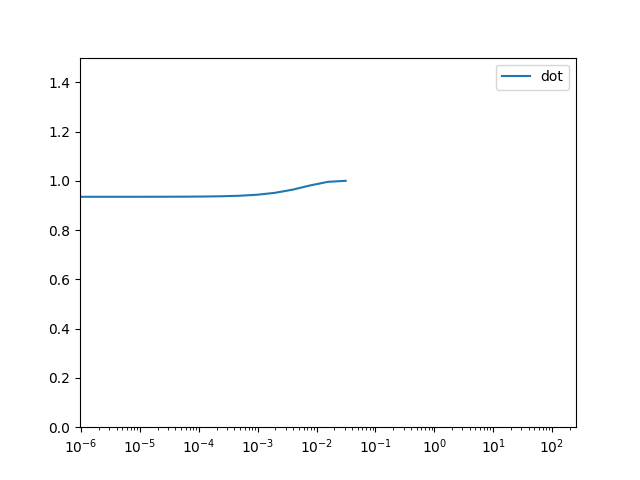

N: 100 D: 10


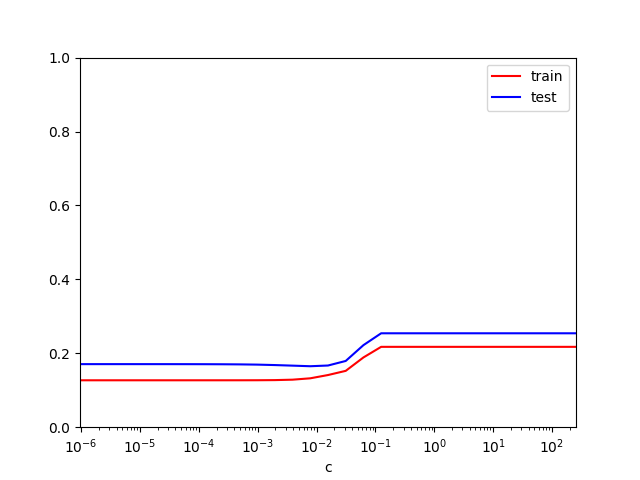

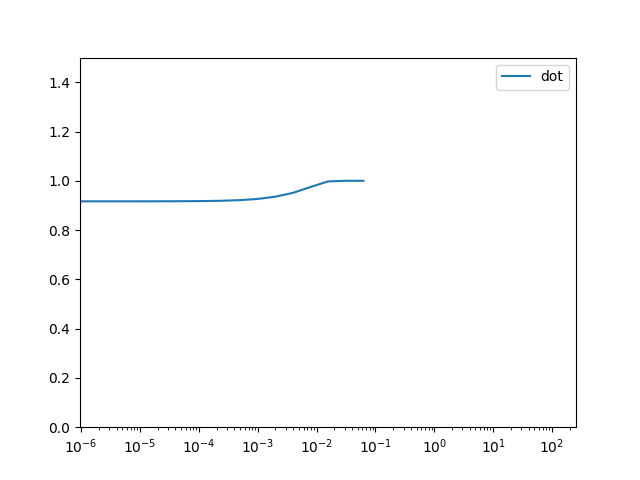

N: 100 D: 20


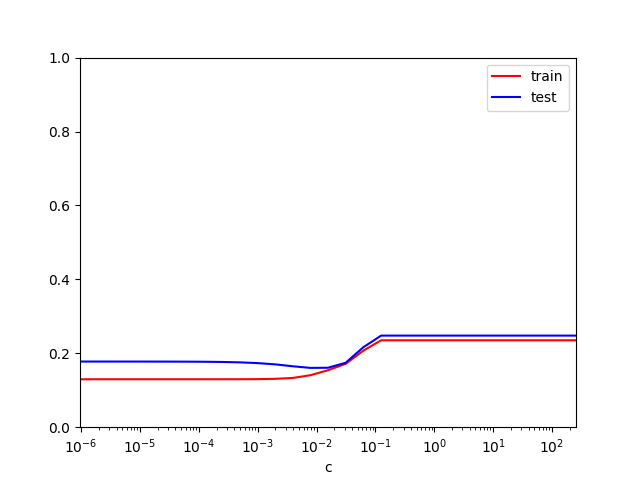

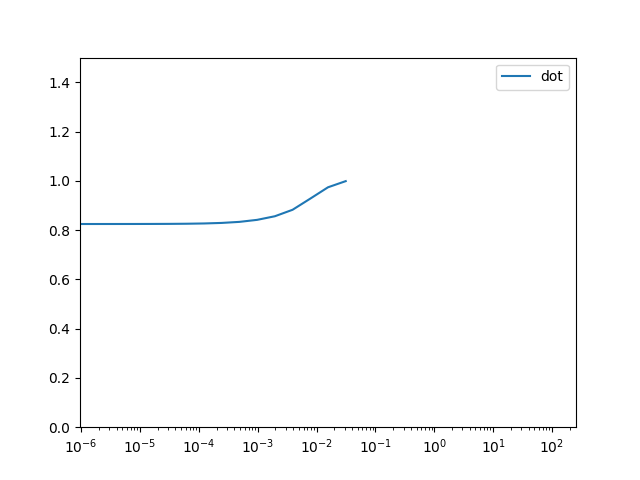

N: 100 D: 30


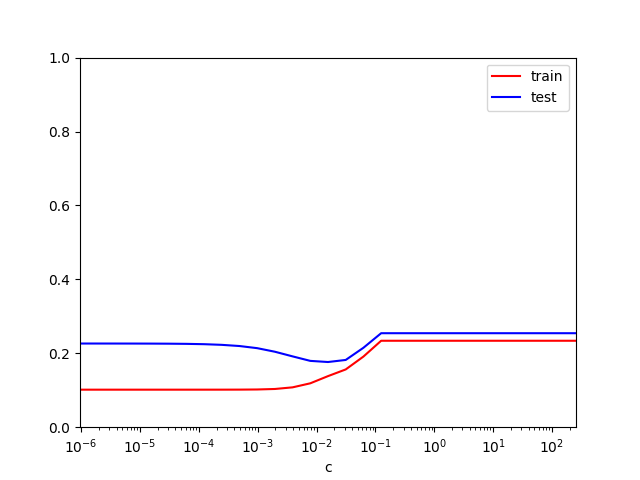

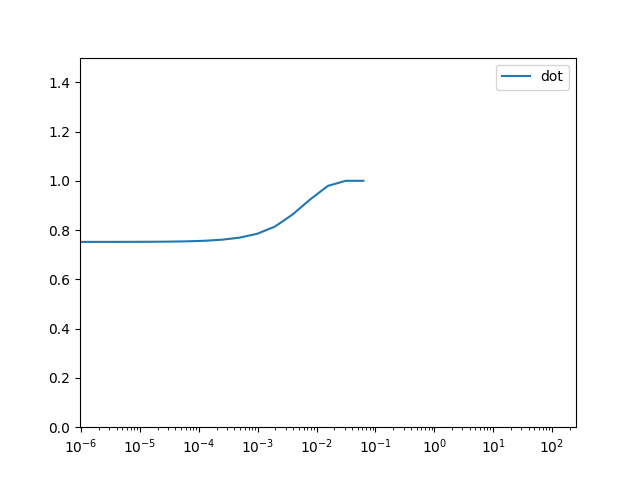

N: 100 D: 40


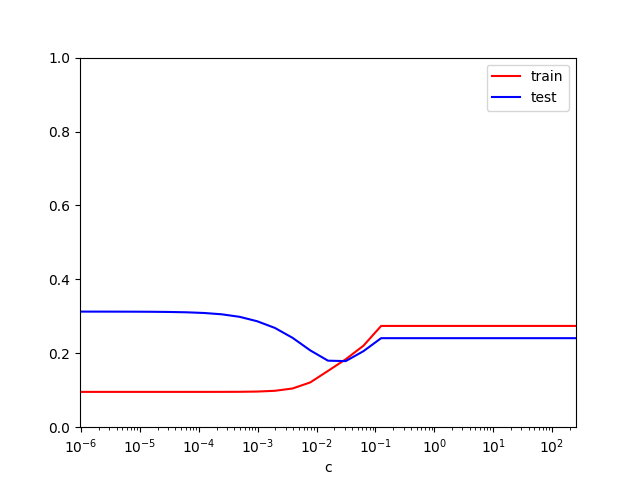

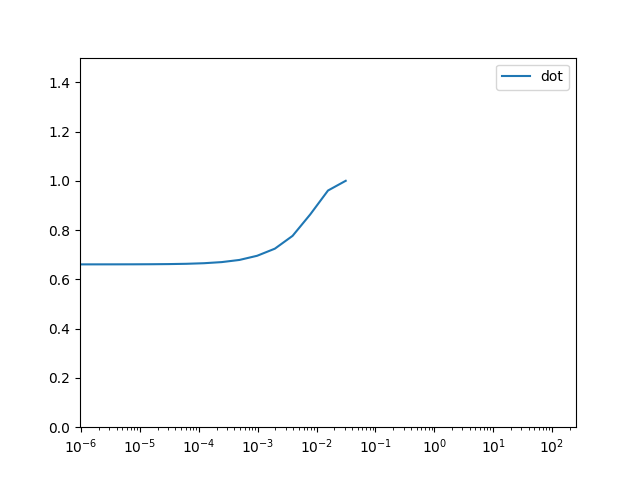

N: 100 D: 50


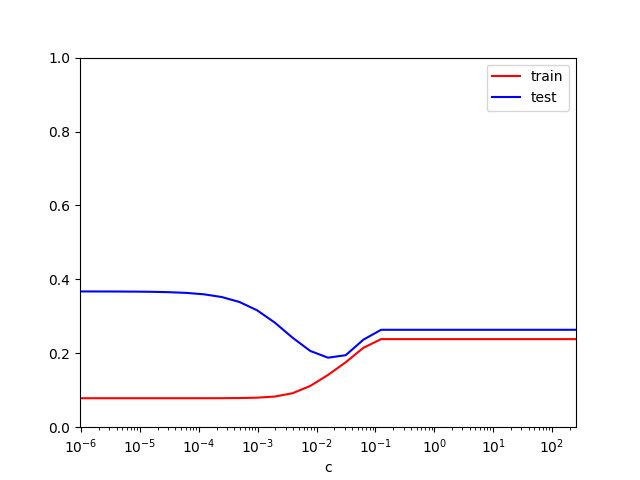

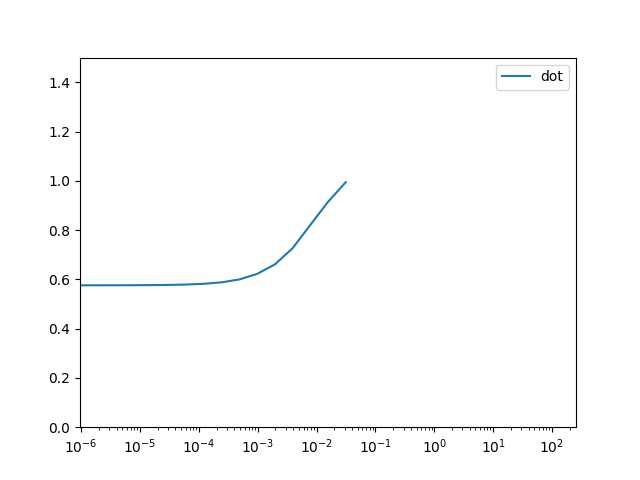

N: 100 D: 60


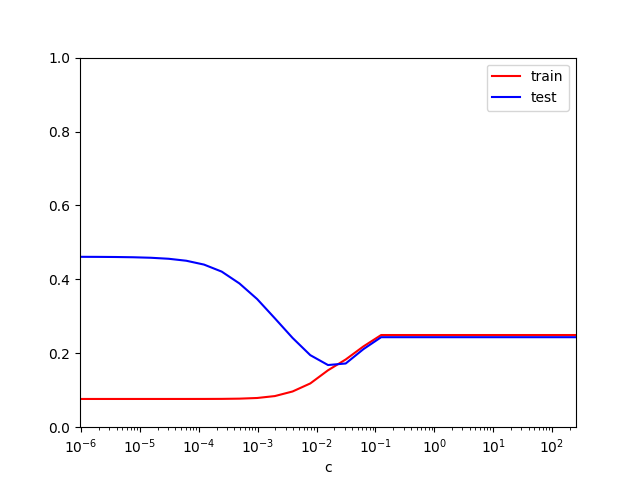

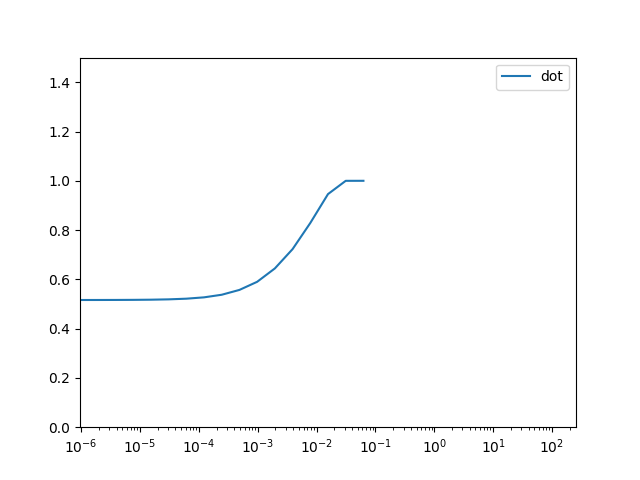

N: 100 D: 70


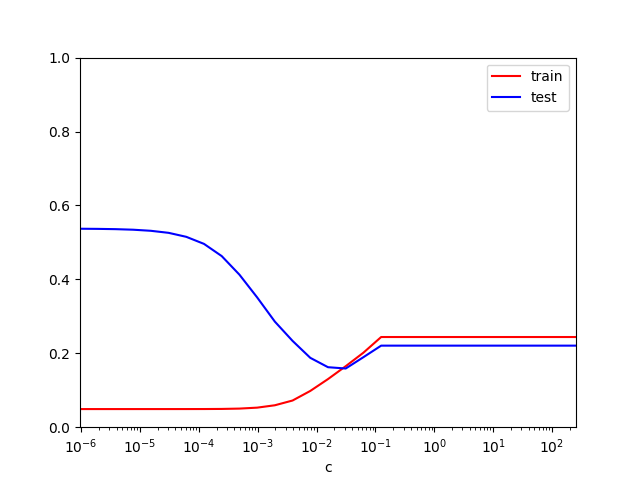

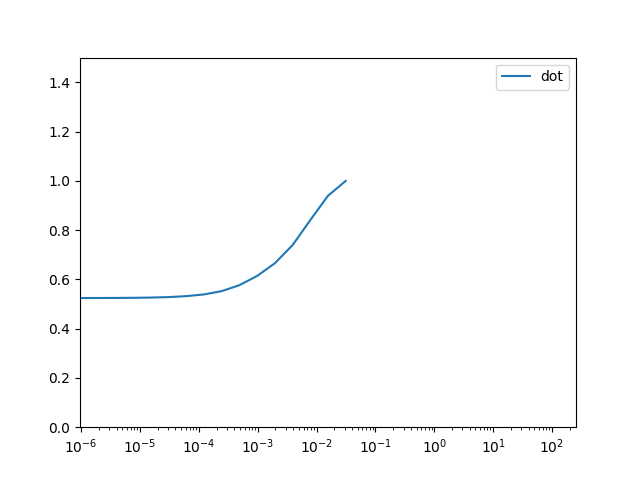

N: 100 D: 80


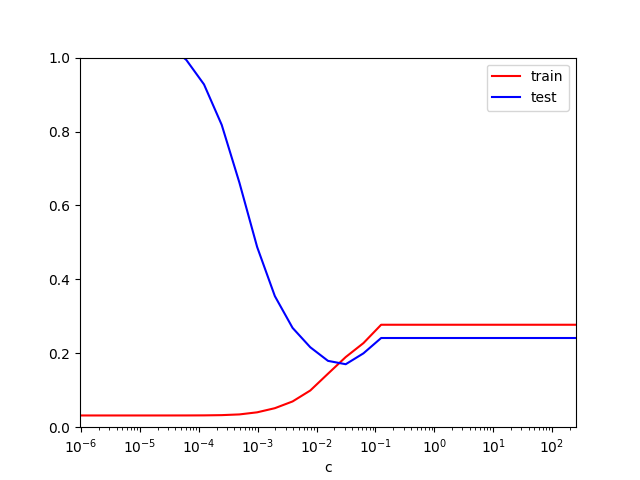

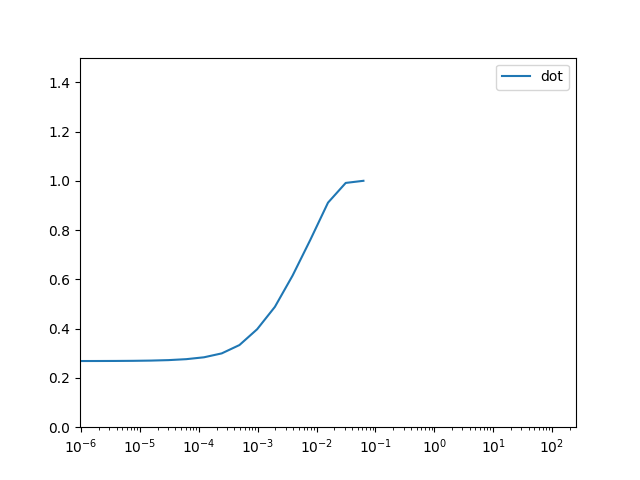

N: 100 D: 90


/Users/fultonw/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:479: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


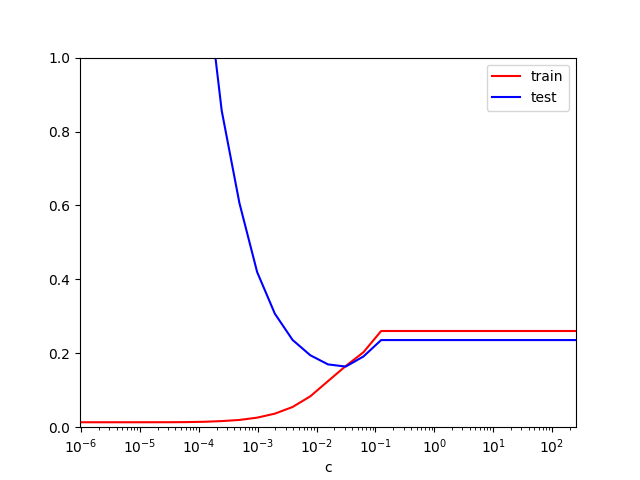

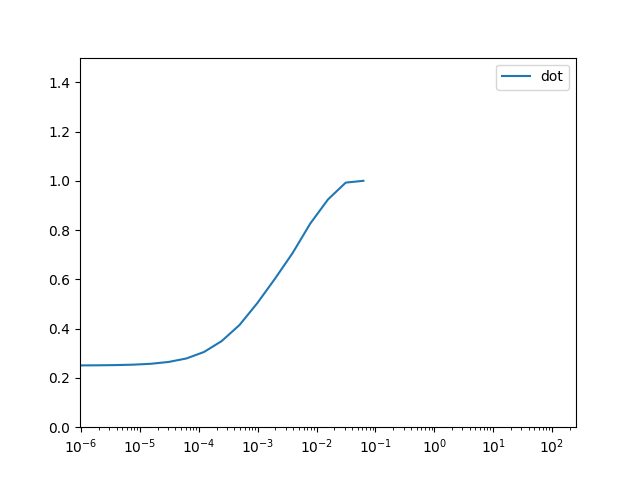

N: 100 D: 100


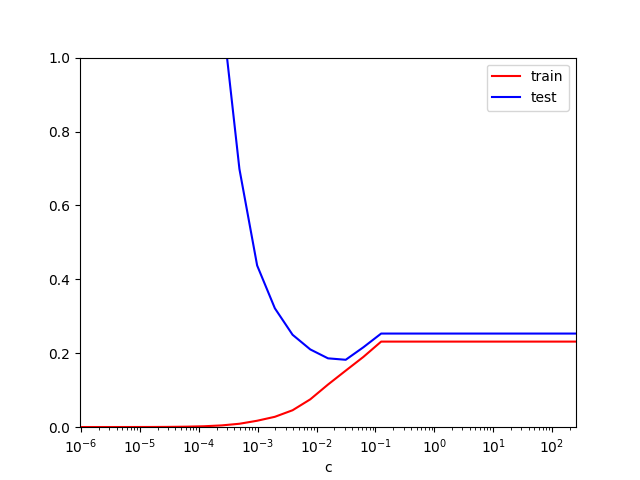

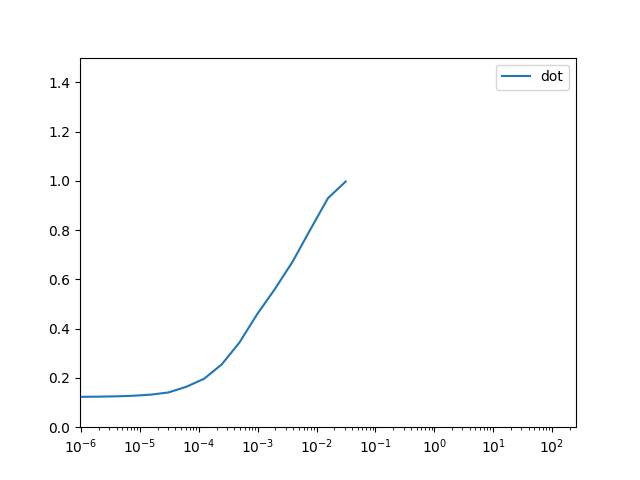

In [7]:
#
from sklearn.linear_model import Lasso
run(get_data, lambda c: Lasso(alpha=c))